In [1]:
plt = plotter()

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import jax
import jax.lax as lax
import jax.numpy as np

In [4]:
from valjax import homotopy, homotopy_param, linear_func, linear_param

### Function

We define our target function to be
$$ f(x,p) = x^2 - 2px + 1 $$
this yields the solutions in $x$ for given $p$ of
$$ x^{\ast}(p) = p \pm \sqrt{p^2-1} $$

In [5]:
func = lambda x, p: x**2 - 2*p*x + 1

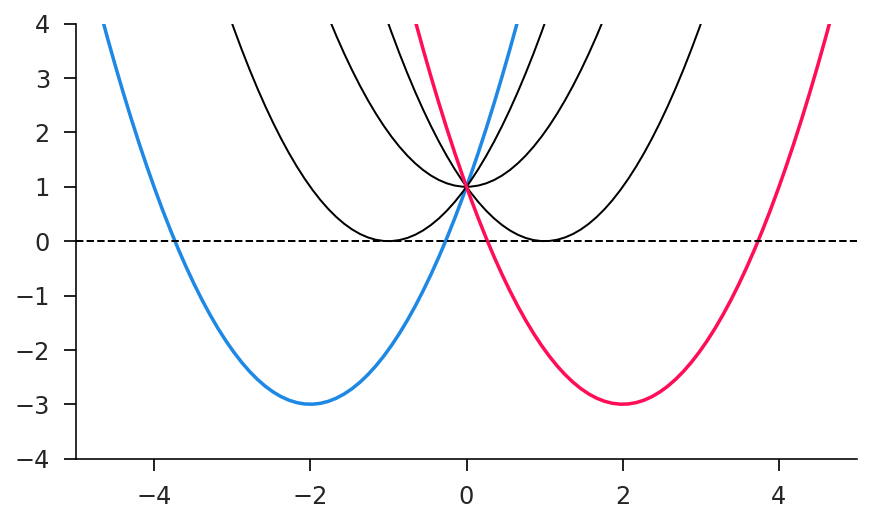

In [6]:
xgrid = np.linspace(-5, 5, 100)
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(xgrid, func(xgrid, -2))
ax.plot(xgrid, func(xgrid, -1), color='k', linewidth=1)
ax.plot(xgrid, func(xgrid, 0), color='k', linewidth=1)
ax.plot(xgrid, func(xgrid, 1), color='k', linewidth=1)
ax.plot(xgrid, func(xgrid, 2))
ax.plot(xgrid, np.zeros_like(xgrid), color='k', linestyle='--', linewidth=1)
ax.set_ylim(-4, 4); ax.set_xlim(-5, 5);

### Param Path

In [7]:
p0 = np.array([-2.0 + 0.0j])
p1 = np.array([2.0 + 0.0j])
x0a = p0 - np.sqrt(p0**2-1)
x0b = p0 + np.sqrt(p0**2-1)

In [15]:
xp1, pp1, tp1 = homotopy_param(func, p0, p1, x0a, lift=0.01, K=500)
xp2, pp2, tp2 = homotopy_param(func, p0, p1, x0b, lift=0.01, K=500)

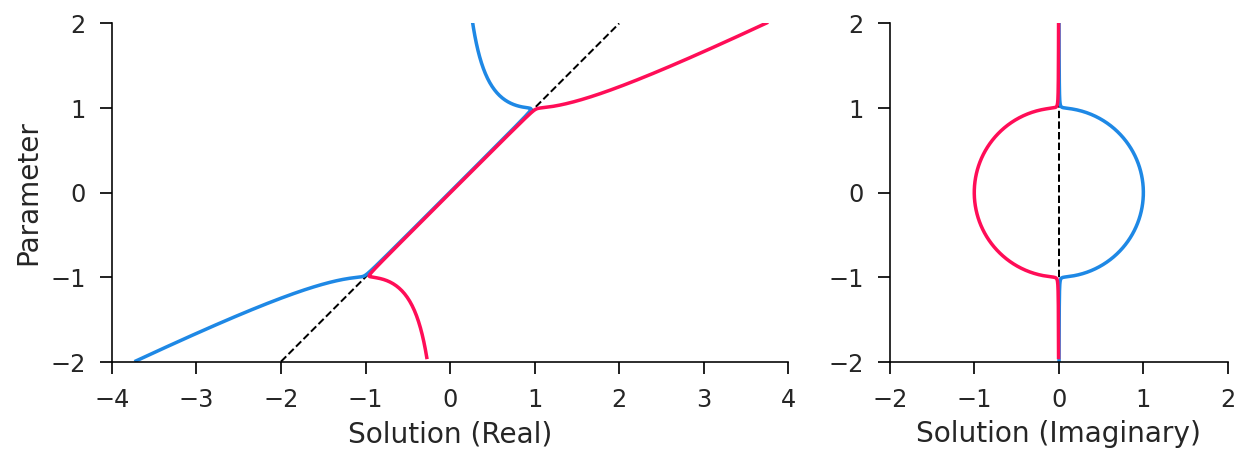

In [16]:
fig = plt.figure(figsize=(10, 4))
ax0, ax1 = fig.subplots(ncols=2, gridspec_kw=dict(width_ratios=[2, 1]))
ax0.plot(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100), linewidth=1, color='k', linestyle='--')
ax1.plot(np.zeros(100), np.linspace(-2, 2, 100), linewidth=1, color='k', linestyle='--')
ax0.plot(xp1.real, pp1.real); ax0.plot(xp2.real, pp2.real)
ax1.plot(xp1.imag, pp1.real); ax1.plot(xp2.imag, pp2.real)
ax0.set_xlabel('Solution (Real)'); ax1.set_xlabel('Solution (Imaginary)')
ax0.set_ylabel('Parameter')
ax0.set_ylim(-2, 2); ax1.set_ylim(-2, 2)
ax0.set_xlim(-4, 4); ax1.set_xlim(-2, 2)
ax0.set_yticks([-2, -1, 0, 1, 2]); ax1.set_yticks([-2, -1, 0, 1, 2])
ax0.set_aspect('equal'); ax1.set_aspect('equal');

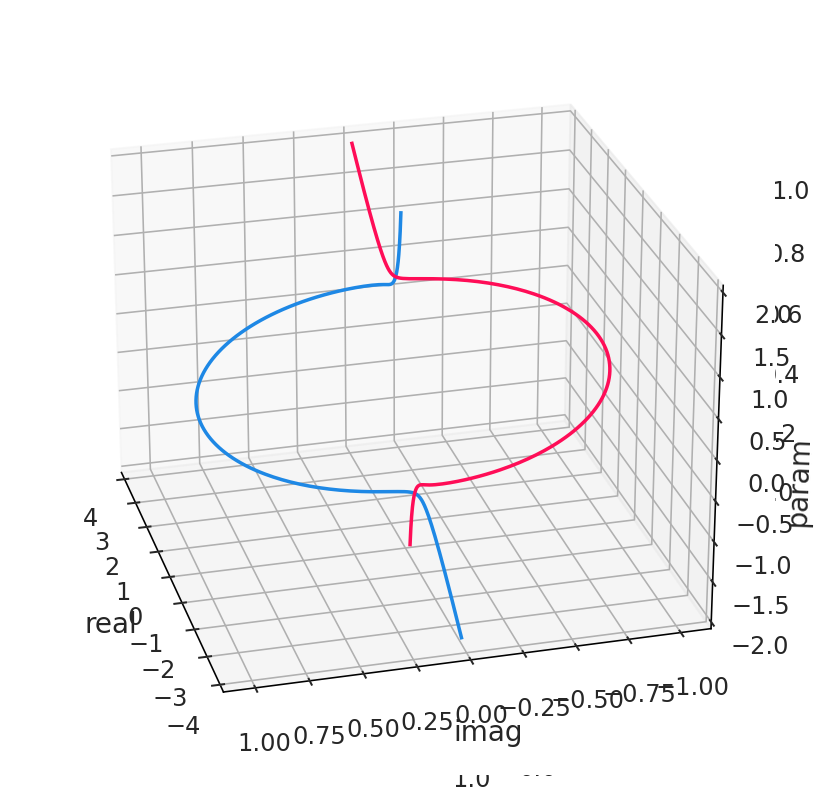

In [17]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax = plt.axes(projection='3d')
ax.plot3D(xp1.real.flatten(), xp1.imag.flatten(), pp1.real.flatten())
ax.plot3D(xp2.real.flatten(), xp2.imag.flatten(), pp2.real.flatten())
ax.set_zlim(-2, 2)
ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('param')
ax.view_init(25, 165);

### Func Path

In [18]:
κ, gp1 = 0.5, 1.2
gunc1 = lambda x: x**2 - κ**2
gunc2 = lambda x: func(x, gp1)

In [19]:
gx0a = np.array([κ + 0.0j])
gx0b = np.array([-κ + 0.0j])

In [20]:
gxp1, gtp1 = homotopy((gunc1, gunc2), gx0a, lift=0.001, K=500)
gxp2, gtp2 = homotopy((gunc1, gunc2), gx0b, lift=0.001, K=500)

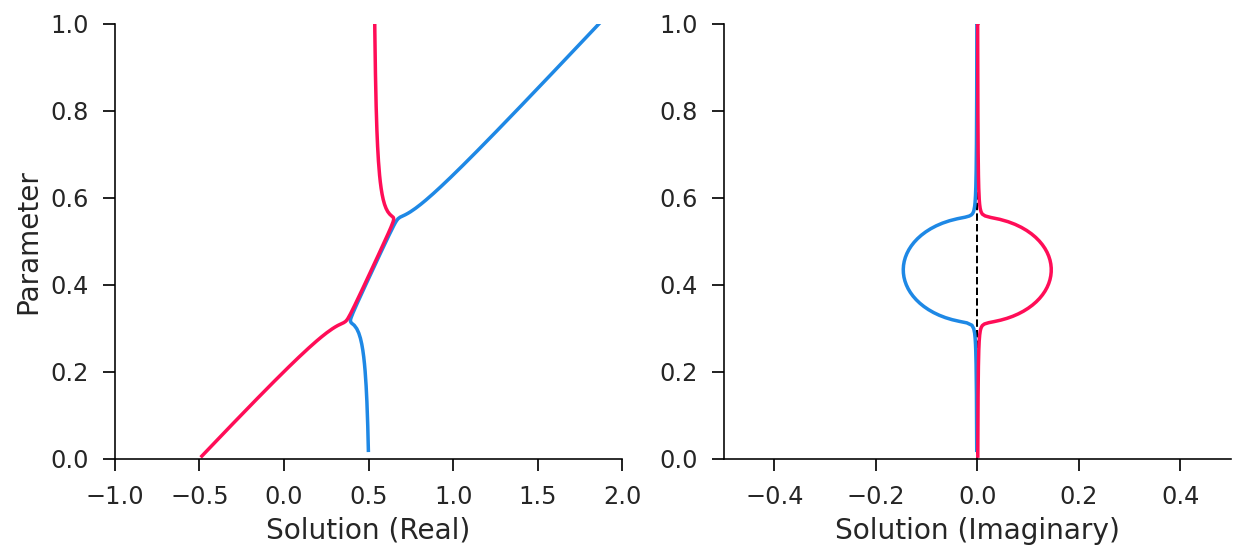

In [21]:
fig = plt.figure(figsize=(10, 4))
ax0, ax1 = fig.subplots(ncols=2, gridspec_kw=dict(width_ratios=[1, 1]))
ax1.plot(np.zeros(100), np.linspace(-2, 2, 100), linewidth=1, color='k', linestyle='--')
ax0.plot(gxp1.real, gtp1.real); ax0.plot(gxp2.real, gtp2.real)
ax1.plot(gxp1.imag, gtp1.real); ax1.plot(gxp2.imag, gtp2.real)
ax0.set_xlabel('Solution (Real)'); ax1.set_xlabel('Solution (Imaginary)')
ax0.set_ylabel('Parameter')
ax0.set_ylim(0, 1); ax1.set_ylim(0, 1)
ax0.set_xlim(-1, 2); ax1.set_xlim(-0.5, 0.5);